<a href="https://colab.research.google.com/github/hetanshipatel/real-time-stock-price-prediction/blob/main/notebooks/01_data_collection_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
STOCK_TICKER = input("Enter stock ticker (e.g., AAPL, TSLA): ").upper()
START_DATE = input("Enter start date: ")

Enter stock ticker (e.g., AAPL, TSLA): tsla
Enter start date: 2013-01-01


In [4]:
stock_df = yf.Ticker(STOCK_TICKER).history(start=START_DATE)

if stock_df.empty:
    raise ValueError("Invalid ticker or no data found")

stock_df.reset_index(inplace=True)
stock_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-01-02 00:00:00-05:00,2.333333,2.363333,2.314000,2.357333,17922000,0.0,0.0
1,2013-01-03 00:00:00-05:00,2.345333,2.363333,2.316667,2.318000,11130000,0.0,0.0
2,2013-01-04 00:00:00-05:00,2.320000,2.320000,2.261333,2.293333,10110000,0.0,0.0
3,2013-01-07 00:00:00-05:00,2.320000,2.320000,2.260000,2.289333,6630000,0.0,0.0
4,2013-01-08 00:00:00-05:00,2.300000,2.300000,2.207333,2.245333,19260000,0.0,0.0


In [5]:
external_tickers = {
    "SP500": "^GSPC",
    "NASDAQ": "^IXIC",
    "VIX": "^VIX",
    "US10Y": "^TNX"
}

external_dfs = []

for name, ticker in external_tickers.items():
    df_ext = yf.Ticker(ticker).history(start=START_DATE)[["Close"]]
    df_ext = df_ext.rename(columns={"Close": name})
    df_ext.reset_index(inplace=True)
    external_dfs.append(df_ext)


In [6]:
df = stock_df.copy()

for ext_df in external_dfs:
    df = pd.merge(df, ext_df, on="Date", how="left")

df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SP500,NASDAQ,VIX,US10Y
0,2013-01-02 00:00:00-05:00,2.333333,2.363333,2.314000,2.357333,17922000,0.0,0.0,1462.420044,3112.260010,14.68,NaN
1,2013-01-03 00:00:00-05:00,2.345333,2.363333,2.316667,2.318000,11130000,0.0,0.0,1459.369995,3100.570068,14.56,NaN
2,2013-01-04 00:00:00-05:00,2.320000,2.320000,2.261333,2.293333,10110000,0.0,0.0,1466.469971,3101.659912,13.83,NaN
3,2013-01-07 00:00:00-05:00,2.320000,2.320000,2.260000,2.289333,6630000,0.0,0.0,1461.890015,3098.810059,13.79,NaN
4,2013-01-08 00:00:00-05:00,2.300000,2.300000,2.207333,2.245333,19260000,0.0,0.0,1457.150024,3091.810059,13.62,NaN


In [7]:
today = datetime.today().strftime("%Y-%m-%d")
file_name = f"{STOCK_TICKER}_raw_data_{today}.csv"
df.to_csv(file_name, index=False)
file_name

'TSLA_raw_data_2026-01-16.csv'

In [8]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

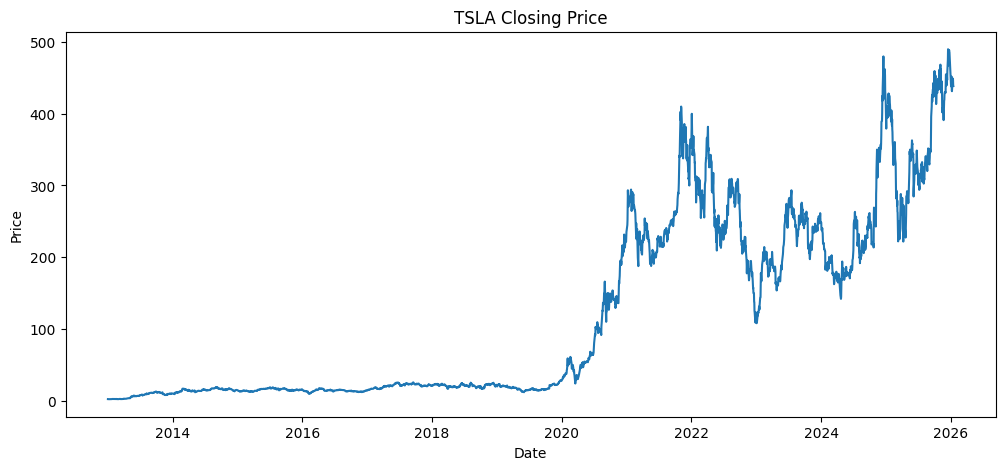

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"])
plt.title(f"{STOCK_TICKER} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

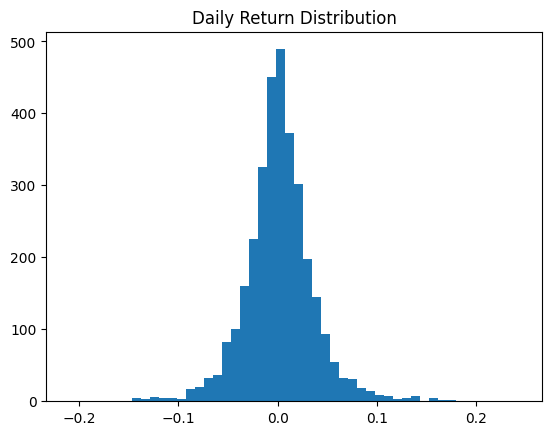

In [10]:
df["Daily_Return"] = df["Close"].pct_change()

plt.hist(df["Daily_Return"].dropna(), bins=50)
plt.title("Daily Return Distribution")
plt.show()

**Observation**